<a href="https://colab.research.google.com/github/KodumuruRaja/Instance-Based-Algorithms/blob/main/Self-Organizing-Map-(MiniSom).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install minisom

In [ ]:
from minisom import MiniSom
from sklearn.datasets import load_breast_cancer
import time

In [ ]:
# Hyperparameter Setting
som_grid_rows=30
som_grid_columns=20
iterations=500
sigma=1
learning_rate=0.5

In [ ]:
data,target=load_breast_cancer(True)

In [ ]:
#Initialization
som=MiniSom(x=som_grid_rows,
            y=som_grid_columns,
            input_len=data.shape[1],
            sigma=sigma,
            learning_rate=learning_rate)
som.random_weights_init(data)

In [ ]:
# training
start_time=time.time()
som.train_random(data,iterations) #training with 100 iterations
elapsed_time=time.time()-start_time
print(elapsed_time,"seconds")

0.09816098213195801 seconds


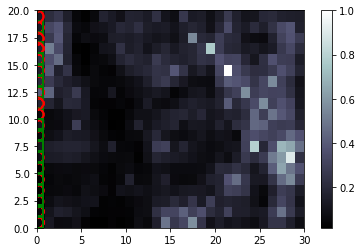

In [ ]:
from pylab import plot,axis,show,pcolor,colorbar,bone
bone()
pcolor(som.distance_map().T) #distance map as background
colorbar()
# use different colors and markers for each label
markers=['o','s','D']
colors=['r','g','b']
for cnt,xx in enumerate(data):
  w=som.winner(xx) #getting the winner
  # place a marker on the winning position for the sample xx
  plot(w[0]+.5,markers[target[cnt]],markerfacecolor='None',markeredgecolor=colors[target[cnt]],markersize=12,markeredgewidth=2)
axis([0,som._weights.shape[0],0,som._weights.shape[1]])
show()